## Introduction:-
This program implements the Travelling Salesman Problem using Genetic Algorithm. The graph consists of 5 vertices each interconnected to one another. The graph is always fully-connected in TSP problem. 
- Encoding -> Permutation Encoding
- Fitness Function -> total distance travelled using the given order of vertices.
- Selection -> Roulette Wheel Selection
- Crossover -> David Crossover (OX1)
- Mutation -> Swap Mutation
- Population Size = 10
- Number of Generations = 30
- Chromosome Size = 5 (equal to the number of vertices)
- Crossover Rate = 0.9 and Mutation Rate = 0.1 

In [173]:
# All the training parameters

#Population Size
pop_size = 8

#Number of generations
num_gen = 30

#Chromosome Size
chromo_size = 5

#Crossover Rate
crossover_rate = 0.9

#Mutation Rate
mutation_rate = 0.2

#Elitism Factor
elitism = 2

#number of iterations
num_iter = 10


In [129]:
from itertools import permutations 
import numpy as np

#Generate_Initial() generates the intial population by generation the permutations of the set of vertices (1-5) using permutations function in Python. It takes as arguments the population size and chromosome size.

def Generate_Initial():

    #stores the initial population
    pop = [[] for j in range(pop_size)]

    #generate permutations of list [1 - chromosome size]
    permute = list(permutations(range(1, chromo_size + 1)))

    #take random permutations equal to population size
    j = 0
    till_now = [] #stores the till now selected permutations
    while j < pop_size:
        #generate a random index
        r = np.random.randint(0, len(permute))

        #if the index not selected yet
        if r not in till_now:
            pop[j] = list(permute[r])
            till_now.append(r) #append the index selected
            j += 1 
    
    return pop #return the initial population

# Generate_Initial()




In [130]:
#This section creates the graph data structure using adjancency matrix. 
'''
[[0. 2. 5. 3. 6.]
 [2. 0. 4. 3. 3.]
 [5. 4. 0. 7. 3.]
 [3. 3. 7. 0. 3.]
 [6. 3. 3. 3. 0.]]
 '''

#create a 2d array for the graph initialized with all zeros
graph = np.zeros((chromo_size, chromo_size))

#Add the edges distance by taking as input the distance for each pair of vertices
for j in range(chromo_size):
    for i in range(chromo_size):
        #no self loops
        if i == j:
            continue

        #if the distance is already set (symmetric matrix), no need to take the distance as input
        if not(graph[i, j] == 0):
            continue

        #take the distance as input
        dist = int(input("Enter distance of s = {} and d = {}".format(j + 1, i + 1)))

        #set the distance
        graph[i, j] = dist
        graph[j, i] = dist

print(graph)




[[0. 2. 3. 5. 6.]
 [2. 0. 7. 3. 3.]
 [3. 7. 0. 4. 3.]
 [5. 3. 4. 0. 3.]
 [6. 3. 3. 3. 0.]]


In [152]:
#Get_Fitness() returns the fitness array for the chromosome passed as argument. The fitness is calculated as the sum of distances between pair of vertices in the chromosome starting from the left. Smaller the distance, higher the fitness. (1.0/distance). Returns the fitness value for the given chromosome.

def Get_Fitness(chromo):
    #stores the sum of dist
    sum_dist = graph[chromo[chromo_size - 1] - 1][0]

    #calculate the sum of distance
    for i in range(1, chromo_size):
        #add the distance to the sum
        sum_dist += graph[chromo[i-1]-1, chromo[i]-1]

    return 1.0/sum_dist #return the fitness value

# Get_Fitness([1, 2, 3, 4, 5])

In [153]:
#Assign_Area() is used to assign area to each chromosome in the roulette wheel for the next step of selection of two parents. It takes as argument the fitness array and returns the area array of the same size as the fitness array.

def Assign_Area(fitness):
    #stores the sum of all the fitness values
    sum = np.sum(fitness)

    #assign area to each chromosome 
    area = [fitness[i]/sum for i in range(pop_size)]

    #return the area array
    return area 

In [154]:
#Roulette_Wheel() is responsible to select two parents for the next step of crossover. It selects the parents based on the area assigned to each one of them in the roulette wheel. It takes as argument the area array and returns two distince selected parents. 

def Roulette_Wheel(area):

    #initially both the parents are -1
    p1, p2 = -1, -1

    #stores the number of parents selected
    count_par = 0

    #while two parents are not selected
    while count_par < 2:
        #generate a random number for cumulative prob
        r = np.random.rand()

        #stores the cumulative prob sum
        sum = 0.0
        i = -1
        while sum < r and i < pop_size:
            i += 1
            sum += area[i]
        
        #first parent only not selected
        if p1 == -1:
            p1 = i
            count_par += 1 #increas the count of selected parents
        elif p2 == -1 and p1 != i: #to avoid non-repeating parents
            p2 = i
            count_par += 1
    
    #return the two parents
    return (p1, p2)

In [162]:

#this function performs the crossover of the p1 and p2. It keeps the material info of p1 and modifies the rest based on p2. It returns the new offspring
def Crossover_util(p1, p2, point1, point2):
    #set the child to be 0
    o = [0 for i in range(chromo_size)]

    #copy the middle part as it is
    o[point1:point2] = p1[point1:point2]

    #indices for the rest of chromosome
    i = point1
    j = point2

    count = point2 - point1 #values put till now

    while count < chromo_size:
        #if the integer is not in the offspring
        if p2[i] not in o:
            o[j] = p2[i]
            count += 1

            #increment j only if we found a value to be put
            j = (j + 1)%chromo_size

        #increment i and j in circular fashion
        i = (i + 1)%chromo_size
    
    #return the offspring
    assert isinstance(o, list)
    return o

#Crossover() is used to perform the david crossover of the two selected parents. We are using the first method of OX1. It finally returns the offsprings generated.
def Crossover(p1, p2):
    assert isinstance(p1, list) and isinstance(p2, list)
    #stores the offsprings
    o1, o2 = p1, p2

    #generate a random number to check if the crossover will take place or not
    r = np.random.rand()

    #if the random number if less than the crossover rate, then the crossover will take place, else we will return the parents as it is.
    if r <= crossover_rate:
        #generate two random points in the chromosome
        point1, point2 = -1, -1

        #two distinct integers
        while point1 == point2:
            point1 = np.random.randint(0, chromo_size)
            point2 = np.random.randint(0, chromo_size)

        #set the lower and upper boundary
        point1, point2 = min(point1, point2), max(point1, point2)

        #construct first offspring
        o1 = Crossover_util(p1, p2, point1, point2)
        
        #construct the second offspring
        o2 = Crossover_util(p2, p1, point1, point2)
    
    #return offsprings
    assert isinstance(o1, list) and isinstance(o2, list)
    return (o1, o2)

# print(Crossover([1, 2, 4, 3, 5], [2, 1, 3, 4, 5]))


In [163]:
#Mutation() performs mutation in the chromosome. The mutation used is swap mutation, in which swap any two random positions in the chromosome. It returns the new chromosome. Takes as argument the original chromosome.

def Mutation(chromo):
    assert len(chromo) == chromo_size

    #stores mutated chromosome
    mut_chromo = chromo

    #generate random number to check if mutation will take place
    r = np.random.rand()

    if r <= mutation_rate:
        #generate two random distinct points.
        point1, point2 = -1, -1

        while point1 == point2:
            #generate random integers
            point1 = np.random.randint(0, chromo_size)
            point2 = np.random.randint(0, chromo_size)

        mut_chromo[point1],mut_chromo[point2] = chromo[point2], chromo[point1]
    
    assert isinstance(mut_chromo, list)
    return mut_chromo

# print(Mutation([2, 1, 3, 4, 5]))
        


In [175]:
#TSP() is the main function that runs the genetic algorithm for num_gen generations. We also store the best solution obtained till now in a gbest dictionary. 

def TSP():
    #stores the max fitness of each generation
    max_fitness = [float() for i in range(num_gen)]

    #Generate initial population
    pop = Generate_Initial()

    #Stores the global best solution obtained till now
    gBest = {"index": int(), "sol" : [], "fit" : -1.0}

    #run a loop for the number of generations
    for i in range(num_gen):
        #Calculate the fitness values of each chromosome
        fitness = [Get_Fitness(pop[j]) for j in range(pop_size)]

        #get the maximum fitness of the generation
        max_fitness[i] = np.max(fitness)
        
        if (i + 1)%5 == 0:
            print("Max Fitness = {:.4f} for Generation {}".format(max_fitness[i], i + 1))

        #if found a better solution
        if max_fitness[i] > gBest["fit"]:
            gBest["index"] = i + 1
            gBest["sol"] = pop[np.argmax(fitness)]
            gBest["fit"] = max_fitness[i]
        

        #Perform elitism by taking the top 4 individuals
        indices = (-np.array(fitness)).argsort()[:elitism]

        #stores the new population
        new_pop = []
        for x in indices:
            new_pop.append(pop[x])
        
        #Perform selection and crossover for the remaining offsprings
        area = Assign_Area(fitness)
        for j in range(int((pop_size - elitism)/2)):
            #select 2 parents
            p1, p2 = Roulette_Wheel(area)

            #perform crossover to get 2 offsprings
            o1, o2 = Crossover(pop[p1], pop[p2])

            #append the crossprings in the new population
            new_pop.append(o1)
            new_pop.append(o2)

        assert len(new_pop) == pop_size
        
        #Perform Mutation on the chromosomes leaving the elitism chromosomes as it is
        for j in range(elitism, pop_size):
            new_pop[j] = Mutation(new_pop[j])

        pop = new_pop

        assert len(pop) == pop_size
    
    #return the max fitness and global best solution
    return (max_fitness, gBest)


---------------------------- Iteration Number 1 ----------------------------
Max Fitness = 0.07692307692307693 for Generation 5
Max Fitness = 0.08333333333333333 for Generation 10
Max Fitness = 0.08333333333333333 for Generation 15
Max Fitness = 0.08333333333333333 for Generation 20
Max Fitness = 0.08333333333333333 for Generation 25
Max Fitness = 0.08333333333333333 for Generation 30


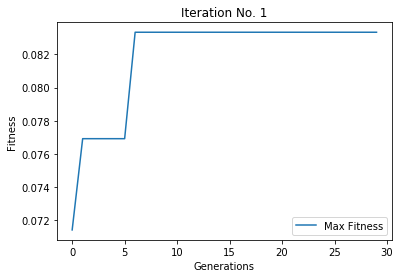

Best Solution is:
Path = [4, 2, 5, 3, 1], Distance = 12.0 and Generation = 7

---------------------------- Iteration Number 2 ----------------------------
Max Fitness = 0.06666666666666667 for Generation 5
Max Fitness = 0.08333333333333333 for Generation 10
Max Fitness = 0.08333333333333333 for Generation 15
Max Fitness = 0.08333333333333333 for Generation 20
Max Fitness = 0.08333333333333333 for Generation 25
Max Fitness = 0.08333333333333333 for Generation 30


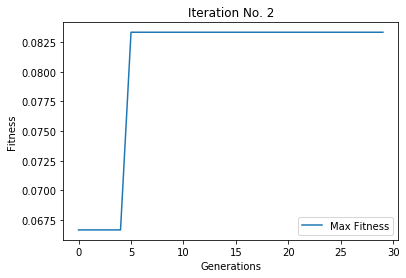

Best Solution is:
Path = [3, 2, 5, 4, 1], Distance = 12.0 and Generation = 6

---------------------------- Iteration Number 3 ----------------------------
Max Fitness = 0.08333333333333333 for Generation 5
Max Fitness = 0.08333333333333333 for Generation 10
Max Fitness = 0.08333333333333333 for Generation 15
Max Fitness = 0.08333333333333333 for Generation 20
Max Fitness = 0.08333333333333333 for Generation 25
Max Fitness = 0.08333333333333333 for Generation 30


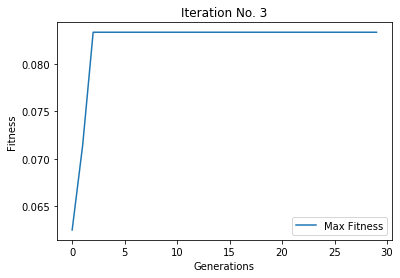

Best Solution is:
Path = [4, 2, 5, 3, 1], Distance = 12.0 and Generation = 3

---------------------------- Iteration Number 4 ----------------------------
Max Fitness = 0.09090909090909091 for Generation 5
Max Fitness = 0.09090909090909091 for Generation 10
Max Fitness = 0.09090909090909091 for Generation 15
Max Fitness = 0.09090909090909091 for Generation 20
Max Fitness = 0.09090909090909091 for Generation 25
Max Fitness = 0.09090909090909091 for Generation 30


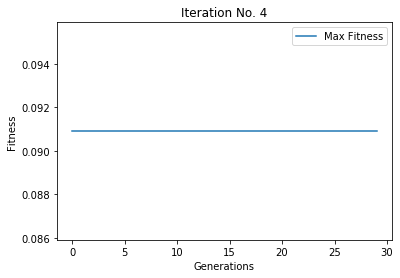

Best Solution is:
Path = [3, 1, 4, 2, 5], Distance = 11.0 and Generation = 1

---------------------------- Iteration Number 5 ----------------------------
Max Fitness = 0.07692307692307693 for Generation 5
Max Fitness = 0.08333333333333333 for Generation 10
Max Fitness = 0.08333333333333333 for Generation 15
Max Fitness = 0.08333333333333333 for Generation 20
Max Fitness = 0.08333333333333333 for Generation 25
Max Fitness = 0.08333333333333333 for Generation 30


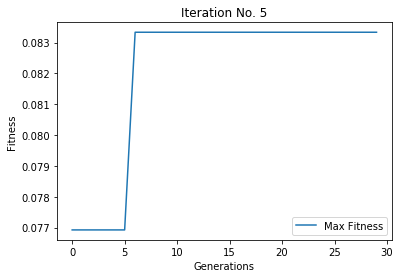

Best Solution is:
Path = [4, 3, 5, 2, 1], Distance = 12.0 and Generation = 7

---------------------------- Iteration Number 6 ----------------------------
Max Fitness = 0.09090909090909091 for Generation 5
Max Fitness = 0.09090909090909091 for Generation 10
Max Fitness = 0.09090909090909091 for Generation 15
Max Fitness = 0.09090909090909091 for Generation 20
Max Fitness = 0.09090909090909091 for Generation 25
Max Fitness = 0.09090909090909091 for Generation 30


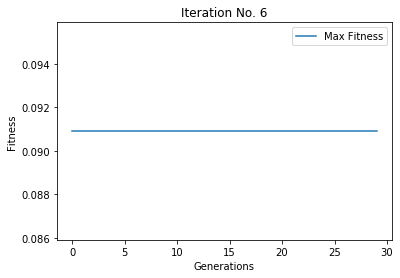

Best Solution is:
Path = [2, 5, 4, 3, 1], Distance = 11.0 and Generation = 1

---------------------------- Iteration Number 7 ----------------------------
Max Fitness = 0.08333333333333333 for Generation 5
Max Fitness = 0.08333333333333333 for Generation 10
Max Fitness = 0.08333333333333333 for Generation 15
Max Fitness = 0.08333333333333333 for Generation 20
Max Fitness = 0.08333333333333333 for Generation 25
Max Fitness = 0.08333333333333333 for Generation 30


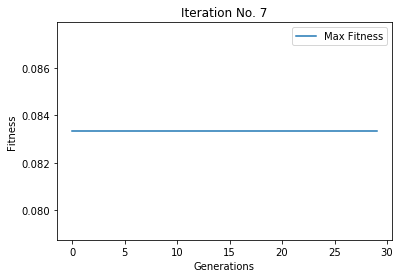

Best Solution is:
Path = [4, 3, 5, 2, 1], Distance = 12.0 and Generation = 1

---------------------------- Iteration Number 8 ----------------------------
Max Fitness = 0.08333333333333333 for Generation 5
Max Fitness = 0.08333333333333333 for Generation 10
Max Fitness = 0.08333333333333333 for Generation 15
Max Fitness = 0.09090909090909091 for Generation 20
Max Fitness = 0.09090909090909091 for Generation 25
Max Fitness = 0.09090909090909091 for Generation 30


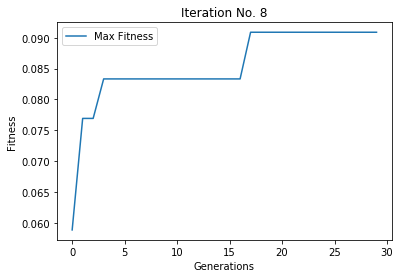

Best Solution is:
Path = [3, 5, 1, 2, 4], Distance = 11.0 and Generation = 18

---------------------------- Iteration Number 9 ----------------------------
Max Fitness = 0.08333333333333333 for Generation 5
Max Fitness = 0.08333333333333333 for Generation 10
Max Fitness = 0.08333333333333333 for Generation 15
Max Fitness = 0.08333333333333333 for Generation 20
Max Fitness = 0.08333333333333333 for Generation 25
Max Fitness = 0.08333333333333333 for Generation 30


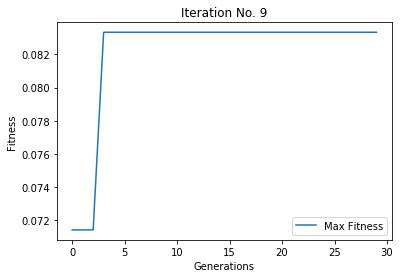

Best Solution is:
Path = [4, 5, 3, 2, 1], Distance = 12.0 and Generation = 4

---------------------------- Iteration Number 10 ----------------------------
Max Fitness = 0.08333333333333333 for Generation 5
Max Fitness = 0.08333333333333333 for Generation 10
Max Fitness = 0.09090909090909091 for Generation 15
Max Fitness = 0.09090909090909091 for Generation 20
Max Fitness = 0.09090909090909091 for Generation 25
Max Fitness = 0.09090909090909091 for Generation 30


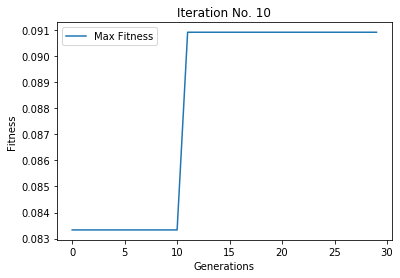

Best Solution is:
Path = [3, 5, 4, 2, 1], Distance = 11.0 and Generation = 12


In [178]:
import matplotlib.pyplot as plt

#run this method for 10 iterations to get the best solution
for i in range(num_iter):
    print("\n---------------------------- Iteration Number {} ----------------------------".format(i + 1))
    max_fitness, gBest = TSP()
    line1 = plt.plot(max_fitness)
    plt.title("Iteration No. {}".format(i + 1))
    plt.legend(["Max Fitness"])
    plt.xlabel("Generations")
    plt.ylabel("Fitness")

    plt.show()

    print("Best Solution is:")
    print("Path = {}, Distance = {} and Generation = {}".format(gBest["sol"], 1.0/gBest["fit"], gBest["index"]))

